In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

sentences = [
    "Natural language processing is a subfield of computer science and especially artificial intelligence.",
    "It is primarily concerned with providing computers with the ability to process data encoded in natural language and is thus closely related to information retrieval, knowledge representation and computational linguistics, a subfield of linguistics.",
    "Major tasks in natural language processing are speech recognition, text classification, natural-language understanding, and natural-language generation.",
]

# Tokenizeing
tokenized_sentences = [sentence.lower().split() for sentence in sentences]

all_words = [word for sentence in tokenized_sentences for word in sentence]

unique_words = sorted(set(all_words))

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform([[word] for word in unique_words])

df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['word']))
df.insert(0, 'word', unique_words)
print(df)


                word  word_a  word_ability  word_and  word_are  \
0                  a     1.0           0.0       0.0       0.0   
1            ability     0.0           1.0       0.0       0.0   
2                and     0.0           0.0       1.0       0.0   
3                are     0.0           0.0       0.0       1.0   
4         artificial     0.0           0.0       0.0       0.0   
5    classification,     0.0           0.0       0.0       0.0   
6            closely     0.0           0.0       0.0       0.0   
7      computational     0.0           0.0       0.0       0.0   
8           computer     0.0           0.0       0.0       0.0   
9          computers     0.0           0.0       0.0       0.0   
10         concerned     0.0           0.0       0.0       0.0   
11              data     0.0           0.0       0.0       0.0   
12           encoded     0.0           0.0       0.0       0.0   
13        especially     0.0           0.0       0.0       0.0   
14       g

TF-IDF scores for 1 sentence:
science           0.345856
artificial        0.345856
intelligence      0.345856
especially        0.345856
computer          0.345856
subfield          0.263032
of                0.263032
is                0.263032
processing        0.263032
natural           0.204268
and               0.204268
language          0.204268
tasks             0.000000
related           0.000000
understanding     0.000000
providing         0.000000
recognition       0.000000
to                0.000000
text              0.000000
thus              0.000000
representation    0.000000
retrieval         0.000000
process           0.000000
the               0.000000
speech            0.000000
ability           0.000000
linguistics       0.000000
primarily         0.000000
major             0.000000
knowledge         0.000000
it                0.000000
information       0.000000
in                0.000000
generation        0.000000
encoded           0.000000
data              0.00000

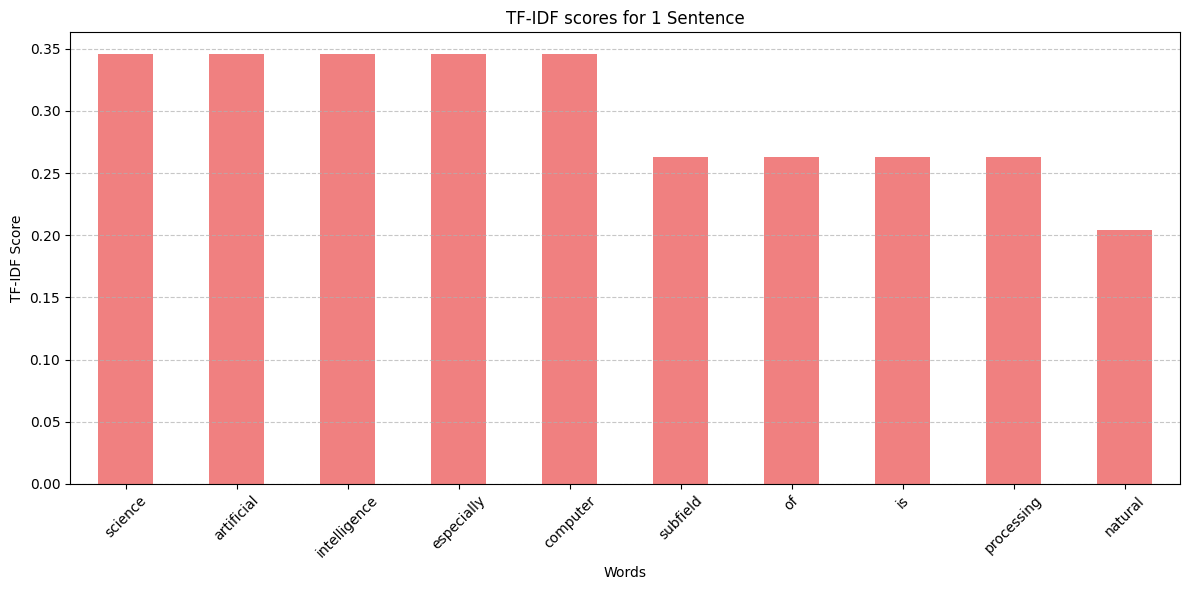

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

sentences = [
    "Natural language processing is a subfield of computer science and especially artificial intelligence.",
    "It is primarily concerned with providing computers with the ability to process data encoded in natural language and is thus closely related to information retrieval, knowledge representation and computational linguistics, a subfield of linguistics.",
    "Major tasks in natural language processing are speech recognition, text classification, natural-language understanding, and natural-language generation.",
]

sentence = [sentence.lower() for sentence in sentences]

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(sentences)

df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
  
tfidf_scores = df_tfidf.iloc[0]
tfidf_sorted = tfidf_scores.sort_values(ascending=False)

print("TF-IDF scores for 1 sentence:")
print(tfidf_sorted)

plt.figure(figsize=(12, 6))
tfidf_sorted.head(10).plot(kind='bar', color='lightcoral')
plt.title(f'TF-IDF scores for 1 Sentence')
plt.ylabel('TF-IDF Score')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Cosine similarity (CBOW): 0.7571342
Cosine similarity (SkipGram): 0.4891361


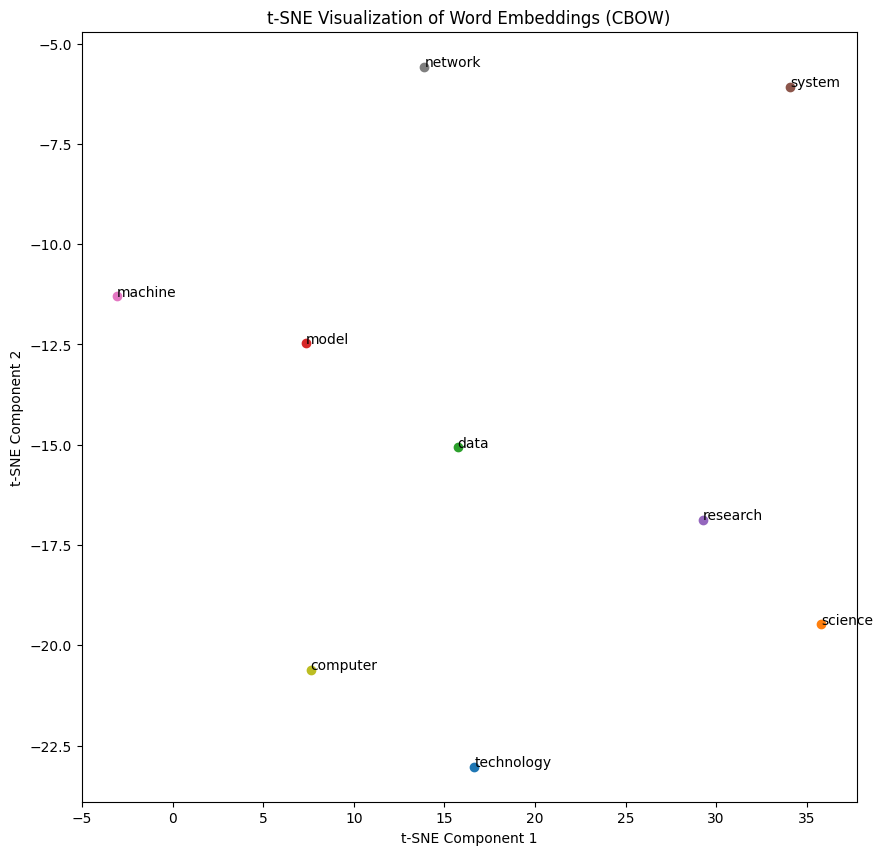

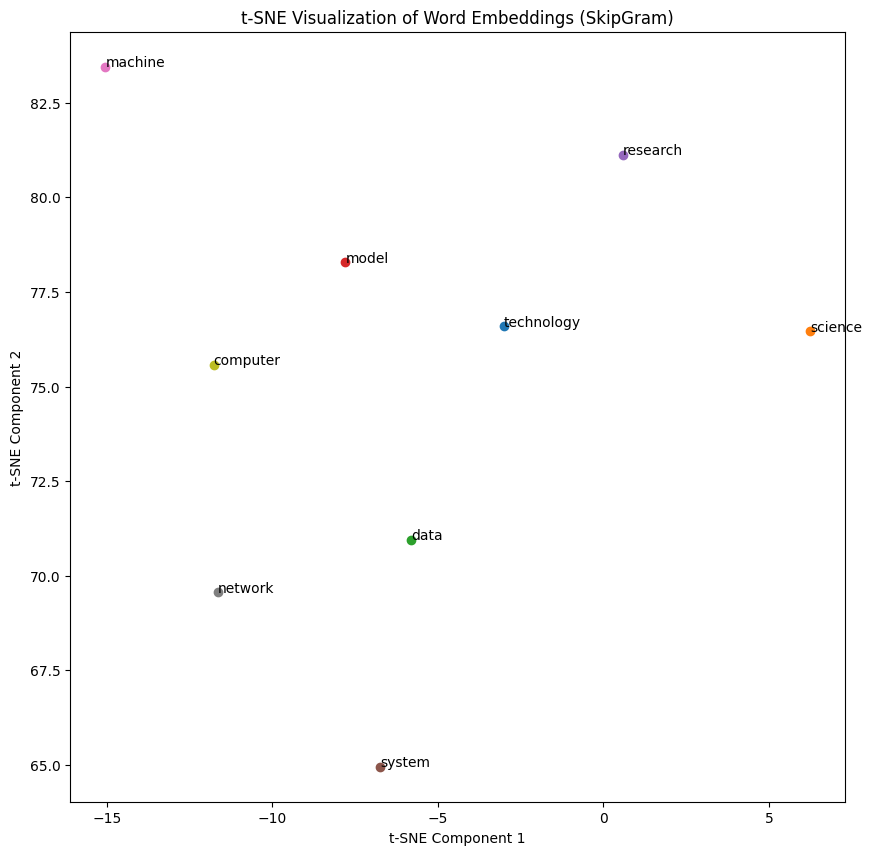

In [13]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from datasets import load_dataset
from nltk.tokenize import word_tokenize
from scipy.spatial.distance import cosine

# Download the dataset
dataset = load_dataset("wikitext", "wikitext-103-raw-v1", split='train[:1%]')

# Preprocess the dataset
tokenized_texts = [word_tokenize(text.lower()) for text in dataset["text"]]

# Create CBOW Model
cbow_model = gensim.models.Word2Vec(sentences=tokenized_texts, min_count=1, vector_size=100, window=5, sg=0)

# Skip-gram Model
skipgram_model = gensim.models.Word2Vec(sentences=tokenized_texts, min_count=1, vector_size=100, window=5, sg=1)

print("Cosine similarity (CBOW):", cbow_model.wv.similarity("machine", "computer"))
print("Cosine similarity (SkipGram):", skipgram_model.wv.similarity("machine", "computer"))

def visualize_embeddings_tsne(model, words, method):
    word_vectors = np.array([model.wv[word] for word in words]) 
    reducer = TSNE(n_components=2, perplexity=5, random_state=42)
    reduced_vectors = reducer.fit_transform(word_vectors)

    plt.figure(figsize=(10, 10))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

    plt.xlabel("t-SNE Component 1") 
    plt.ylabel("t-SNE Component 2")  

    if method == 'CBOW':
        plt.title("t-SNE Visualization of Word Embeddings (CBOW)")
    else:   
        plt.title("t-SNE Visualization of Word Embeddings (SkipGram)")
    plt.show()

words_example = ["technology", "science", "data", "model", "algorithm", "research", "system", "machine", "network", "computer"]
available_words = [word for word in words_example if word in cbow_model.wv]

visualize_embeddings_tsne(cbow_model, available_words, 'CBOW')
visualize_embeddings_tsne(skipgram_model, available_words, 'SkipGram')


Cosine similarity (GloVe): 0.40792770777618437
Top 5 similar to 'science': [('sciences', 0.8073160926458346), ('physics', 0.7914698274966627), ('institute', 0.7663252229752445), ('mathematics', 0.7607672719452623), ('studies', 0.7590447464281198)]


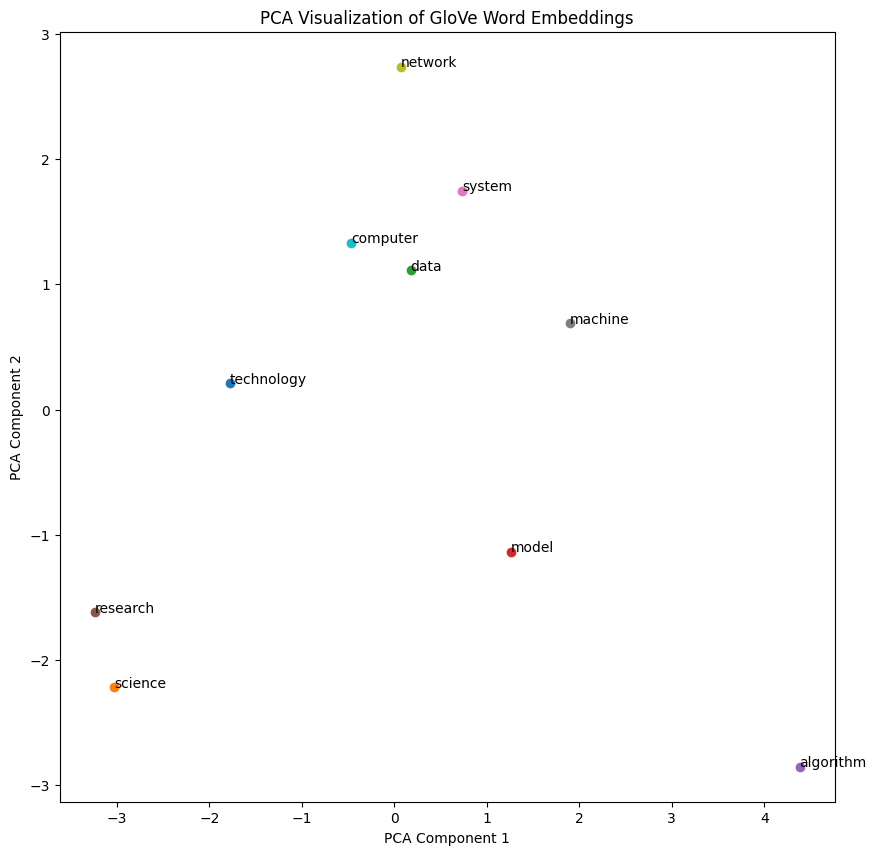

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine

glove_p = "glove.6B.100d.txt"

glove = {}
with open(glove_p, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype="float32")
        glove[word] = vector

def most_similar_glove(target_word, glove, top_n=5):
    if target_word not in glove:
        return []
    target_vec = glove[target_word]
    similarities = {
        word: 1 - cosine(target_vec, vec)
        for word, vec in glove.items()
        if word != target_word
    }
    return sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

print("Cosine similarity (GloVe):", 1 - cosine(glove["science"], glove["data"]))
print("Top 5 similar to 'science':", most_similar_glove("science", glove))

words_example = ["technology", "science", "data", "model", "algorithm", "research", "system", "machine", "network", "computer"]

def visualize_glove_pca(words):
    word_vectors = np.array([glove[word] for word in words if word in glove])
    reducer = PCA(n_components=2)
    reduced_vectors = reducer.fit_transform(word_vectors)
    plt.figure(figsize=(10, 10))
    for i, word in enumerate(words):
        if word in glove:
            plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
            plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
    plt.title("PCA Visualization of GloVe Word Embeddings")
    plt.xlabel("PCA Component 1") 
    plt.ylabel("PCA Component 2")  
    plt.show()

visualize_glove_pca(words_example)


['the', ',', '.', 'of', 'and', '@', 'in', 'to', 'a', '=']

Cosine similarity (Word2Vec) - the vs ,: 0.94089895
Cosine similarity (FastText) - the vs ,: 0.9196572


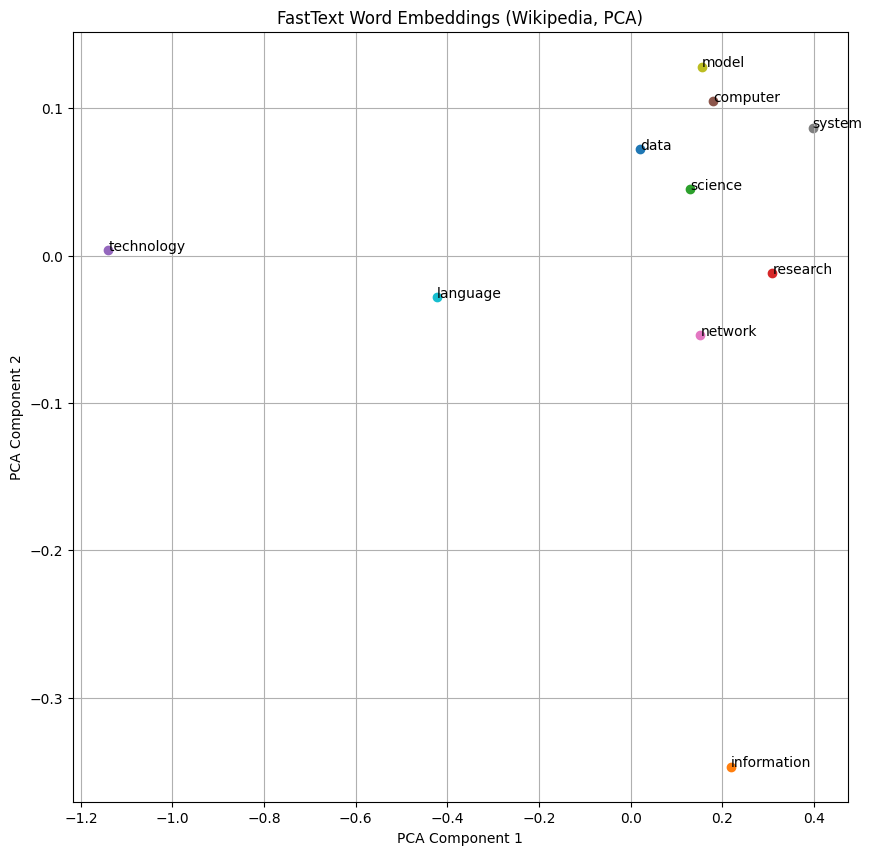

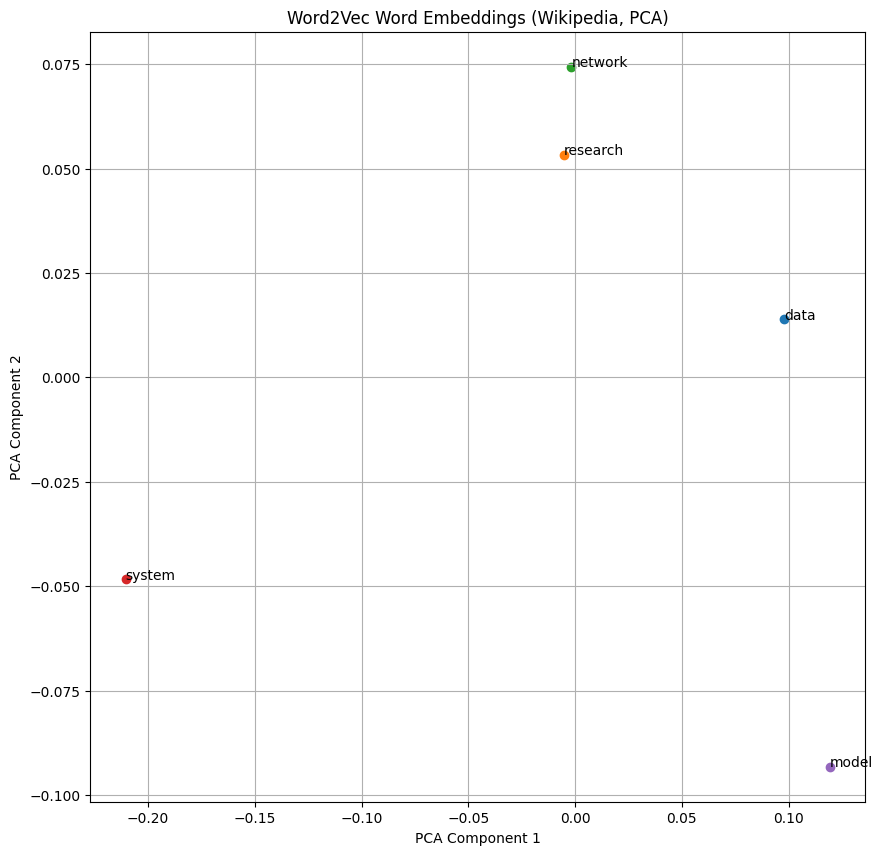

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine
from gensim.models import FastText, Word2Vec
from nltk.tokenize import word_tokenize
from datasets import load_dataset

dataset = load_dataset("wikitext", "wikitext-103-raw-v1", split='train[:1%]')
texts = dataset["text"][:1000] 

tokenized_texts = [word_tokenize(text.lower()) for text in texts if isinstance(text, str)]

fasttext_model = FastText(sentences=tokenized_texts, vector_size=100, window=5, min_count=5, sg=1)
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=5, sg=1)

words_candidates = word2vec_model.wv.index_to_key[:50]
common_words_ft = [word for word in words_candidates if word in fasttext_model.wv][:10]

print(common_words_ft)

if len(common_words_ft) >= 2:
    w1, w2 = common_words_ft[0], common_words_ft[1]
    print(f"\nCosine similarity (Word2Vec) - {w1} vs {w2}:",
          word2vec_model.wv.similarity(w1, w2))
    print(f"Cosine similarity (FastText) - {w1} vs {w2}:",
          fasttext_model.wv.similarity(w1, w2))

words_example = ["data", "information", "science", "research", "technology", "computer", "network", "system", "model", "language"]

def visualize_embeddings(model, words, title):
    vectors = [model.wv[word] for word in words if word in model.wv]
    labels = [word for word in words if word in model.wv]
    reducer = PCA(n_components=2)
    reduced = reducer.fit_transform(vectors)

    plt.figure(figsize=(10, 10))
    for i, word in enumerate(labels):
        plt.scatter(reduced[i, 0], reduced[i, 1])
        plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
    plt.title(title)
    plt.xlabel("PCA Component 1") 
    plt.ylabel("PCA Component 2")  
    plt.grid(True)
    plt.show()

visualize_embeddings(fasttext_model, words_example, "FastText Word Embeddings (Wikipedia, PCA)")
visualize_embeddings(word2vec_model, words_example, "Word2Vec Word Embeddings (Wikipedia, PCA)")


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer (Dropout)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_13 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_14 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.5040 - loss: 0.6987 - val_accuracy: 0.4894 - val_loss: 0.6950
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - accuracy: 0.5154 - loss: 0.6922 - val_accuracy: 0.4944 - val_loss: 0.6981
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.5712 - loss: 0.6594 - val_accuracy: 0.5058 - val_loss: 0.7284
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.6250 - loss: 0.6034 - val_accuracy: 0.5014 - val_loss: 0.7856
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.6529 - loss: 0.5561 - val_accuracy: 0.5024 - val_loss: 0.8459
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.6257 - loss: 0.5930 - val_accuracy: 0.5098 - val_loss: 0.7073
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.5857 - loss: 0.6499 - val_accuracy: 0.5102 - val_loss: 0.7731
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - accuracy: 0.6282 - loss: 0.5855 - 

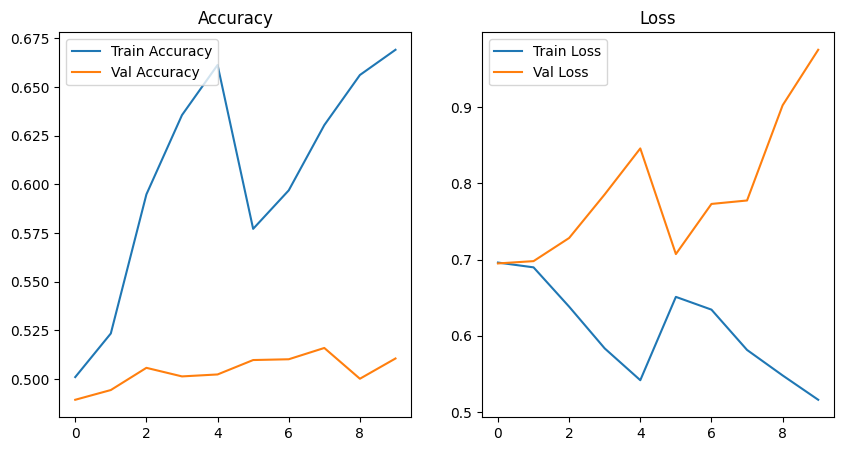

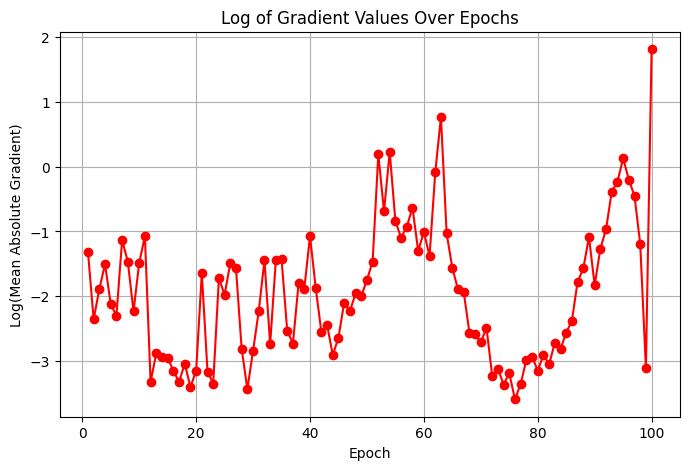

In [ ]:
# Exercise 4, 5: RNN
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

max_len = 200
max_words = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

texts = x_train.tolist() + x_test.tolist()
labels = y_train.tolist() + y_test.tolist()

padded_sequences = pad_sequences(texts, maxlen=max_len, padding="post", truncating="post")
labels = tf.convert_to_tensor(labels, dtype=tf.float32)

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64))
model.add(Dropout(0.2, name="Dropout_Layer"))
model.add(SimpleRNN(128, dropout=0.2, return_sequences=True)) 
model.add(SimpleRNN(64))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(padded_sequences, labels, epochs=10, batch_size=64, validation_split=0.1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epoch") 
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")  
plt.ylabel("Loss")  
plt.legend()
plt.title("Loss")

plt.tight_layout()
plt.show()

def get_gradients_during_training(model, inputs, labels, epochs=10):
    grad_means = []
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    batch_data_x = inputs[:32]
    batch_data_y = labels[:32].numpy().reshape(-1, 1)

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            predictions = model(batch_data_x, training=True)
            loss = tf.keras.losses.binary_crossentropy(batch_data_y, predictions)
        
        gradients = tape.gradient(loss, model.trainable_variables)
        rnn_gradients = gradients[2].numpy().flatten()
        grad_means.append(np.log(np.mean(np.abs(rnn_gradients) + 1e-10)))

        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return grad_means

gradients_over_epochs = get_gradients_during_training(model, padded_sequences, labels, epochs=100)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 101), gradients_over_epochs, marker='o', linestyle='-', color='red')
plt.xlabel("Epoch")  # Подпись оси X
plt.ylabel("Log(Mean Absolute Gradient)")  # Подпись оси Y
plt.title("Log of Gradient Values Over Epochs")
plt.grid()
plt.show()


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 4s 2us/step
Training LSTM...


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training GRU...


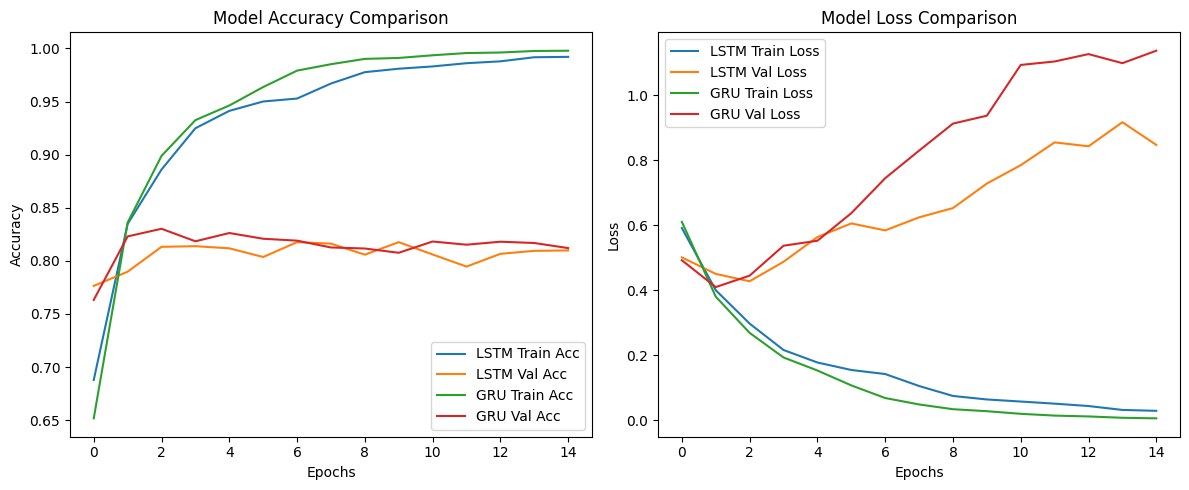

Training Time (LSTM): 303.66 seconds
Training Time (GRU): 310.78 seconds
Final Validation Accuracy (LSTM): 0.8098
Final Validation Accuracy (GRU): 0.8120


In [4]:
# Exercise 6: LSTM vs GRU 

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense
import matplotlib.pyplot as plt
import time
from tensorflow.keras.datasets import imdb


np.random.seed(42)
tf.random.set_seed(42)
(X_train, y_train), (_, _) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()
reverse_word_index = {v: k for k, v in word_index.items()}
decoded_reviews = [" ".join([reverse_word_index.get(i - 3, "?") for i in review]) for review in X_train]

dataset = {
    "train": {
        "text": decoded_reviews,
        "label": y_train
    }
}
max_len = 100
max_words = 10000

tokenizer = Tokenizer(num_words=max_words, oov_token="<UNK>")
tokenizer.fit_on_texts(dataset["train"]["text"])

tokenized_texts = tokenizer.texts_to_sequences(dataset["train"]["text"])
padded_sequences = pad_sequences(tokenized_texts, maxlen=max_len, padding="post", truncating="post")
labels = np.array(dataset["train"]["label"], dtype=np.float32)

# LSTM Model 
print("Training LSTM...")
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1, activation="sigmoid")
])
lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

start_time = time.time()
lstm_history = lstm_model.fit(padded_sequences, labels, epochs=15, batch_size=32, validation_split=0.2, verbose=0)
lstm_time = time.time() - start_time

# GRU Model 
print("Training GRU...")
gru_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    GRU(64, return_sequences=True),
    GRU(32),
    Dense(1, activation="sigmoid")
])
gru_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

start_time = time.time()
gru_history = gru_model.fit(padded_sequences, labels, epochs=15, batch_size=32, validation_split=0.2, verbose=0)
gru_time = time.time() - start_time

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history["accuracy"], label="LSTM Train Acc")
plt.plot(lstm_history.history["val_accuracy"], label="LSTM Val Acc")
plt.plot(gru_history.history["accuracy"], label="GRU Train Acc")
plt.plot(gru_history.history["val_accuracy"], label="GRU Val Acc")
plt.title("Model Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history["loss"], label="LSTM Train Loss")
plt.plot(lstm_history.history["val_loss"], label="LSTM Val Loss")
plt.plot(gru_history.history["loss"], label="GRU Train Loss")
plt.plot(gru_history.history["val_loss"], label="GRU Val Loss")
plt.title("Model Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

lstm_final_acc = lstm_history.history["val_accuracy"][-1]
gru_final_acc = gru_history.history["val_accuracy"][-1]

print("Training Time (LSTM): {:.2f} seconds".format(lstm_time))
print("Training Time (GRU): {:.2f} seconds".format(gru_time))
print("Final Validation Accuracy (LSTM): {:.4f}".format(lstm_final_acc))
print("Final Validation Accuracy (GRU): {:.4f}".format(gru_final_acc))


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from collections import Counter
import requests

url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
response = requests.get(url)
text = response.text.lower()

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

token_list = tokenizer.texts_to_sequences([text])[0]
input_sequences = []

for i in range(3, len(token_list)):
    n_gram_sequence = token_list[i-3:i+1]  
    input_sequences.append(n_gram_sequence)

input_sequences = np.array(input_sequences)
x = input_sequences[:, :-1]
y = input_sequences[:, -1]

model = Sequential()
model.add(Embedding(total_words, 100, input_length=3))
model.add(LSTM(150))
model.add(Dropout(0.4))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x, y, epochs=20, verbose=1)

def generate_text(seed_text, next_words=20, max_repeats=1):
    generated_text = seed_text.lower()
    word_counts = Counter()
    
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([generated_text])[0]
        token_list = pad_sequences([token_list], maxlen=3, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)[0]
        
        top_n = np.argsort(predicted_probs)[-3:]
        top_probs = predicted_probs[top_n]
        top_probs /= np.sum(top_probs)
        predicted = np.random.choice(top_n, p=top_probs)
        
        output_word = tokenizer.index_word.get(predicted, "")
        if word_counts[output_word] >= max_repeats:
            continue
        
        word_counts[output_word] += 1
        generated_text += " " + output_word

    return generated_text

seeds = ["love", "king", "death", "to be"]
for seed in seeds:
    print(f"Generated for '{seed}':\n{generate_text(seed)}\n")


Epoch 1/20


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


6378/6378 ━━━━━━━━━━━━━━━━━━━━ 1532s 240ms/step - accuracy: 0.0357 - loss: 6.9387
Epoch 2/20
6378/6378 ━━━━━━━━━━━━━━━━━━━━ 166s 26ms/step - accuracy: 0.0721 - loss: 6.3193
Epoch 3/20
6378/6378 ━━━━━━━━━━━━━━━━━━━━ 168s 26ms/step - accuracy: 0.0812 - loss: 6.0803
Epoch 4/20
6378/6378 ━━━━━━━━━━━━━━━━━━━━ 173s 27ms/step - accuracy: 0.0885 - loss: 5.9290
Epoch 5/20
6378/6378 ━━━━━━━━━━━━━━━━━━━━ 173s 27ms/step - accuracy: 0.0938 - loss: 5.8253
Epoch 6/20
6378/6378 ━━━━━━━━━━━━━━━━━━━━ 173s 27ms/step - accuracy: 0.0987 - loss: 5.7464
Epoch 7/20
6378/6378 ━━━━━━━━━━━━━━━━━━━━ 173s 27ms/step - accuracy: 0.1031 - loss: 5.6795
Epoch 8/20
6378/6378 ━━━━━━━━━━━━━━━━━━━━ 173s 27ms/step - accuracy: 0.1062 - loss: 5.6267
Epoch 9/20
6378/6378 ━━━━━━━━━━━━━━━━━━━━ 174s 27ms/step - accuracy: 0.1091 - loss: 5.5845
Epoch 10/20
6378/6378 ━━━━━━━━━━━━━━━━━━━━ 174s 27ms/step - accuracy: 0.1137 - loss: 5.5413
Epoch 11/20
6378/6378 ━━━━━━━━━━━━━━━━━━━━ 174s 27ms/step - accuracy: 0.1151 - loss: 5.5111
Epoch 

Training LSTM...
Training GRU...
Training BiLSTM...


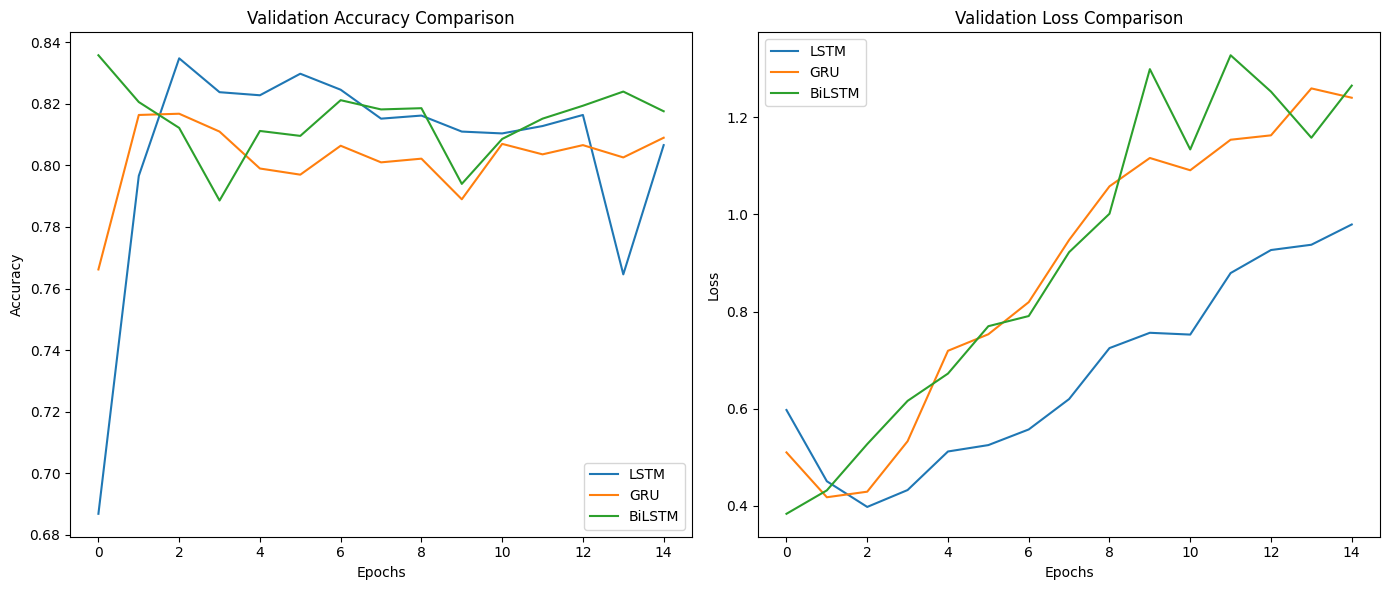

Training Time (LSTM): 308.03 seconds
Training Time (GRU): 317.72 seconds
Training Time (BiLSTM): 422.39 seconds
Final Validation Accuracy (LSTM): 0.8066
Final Validation Accuracy (GRU): 0.8090
Final Validation Accuracy (BiLSTM): 0.8176


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Bidirectional
import matplotlib.pyplot as plt
import time
from tensorflow.keras.datasets import imdb

np.random.seed(42)
tf.random.set_seed(42)

(X_train, y_train), (_, _) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()
reverse_word_index = {v: k for k, v in word_index.items()}
decoded_reviews = [" ".join([reverse_word_index.get(i - 3, "?") for i in review]) for review in X_train]

max_len = 100
max_words = 10000

tokenizer = Tokenizer(num_words=max_words, oov_token="<UNK>")
tokenizer.fit_on_texts(decoded_reviews)

tokenized_texts = tokenizer.texts_to_sequences(decoded_reviews)
padded_sequences = pad_sequences(tokenized_texts, maxlen=max_len, padding="post", truncating="post")
labels = np.array(y_train, dtype=np.float32)

print("Training LSTM...")
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1, activation="sigmoid")
])
lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

start_time = time.time()
lstm_history = lstm_model.fit(padded_sequences, labels, epochs=15, batch_size=32, validation_split=0.2, verbose=0)
lstm_time = time.time() - start_time

print("Training GRU...")
gru_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    GRU(64, return_sequences=True),
    GRU(32),
    Dense(1, activation="sigmoid")
])
gru_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

start_time = time.time()
gru_history = gru_model.fit(padded_sequences, labels, epochs=15, batch_size=32, validation_split=0.2, verbose=0)
gru_time = time.time() - start_time

print("Training BiLSTM...")
bilstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(1, activation="sigmoid")
])
bilstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

start_time = time.time()
bilstm_history = bilstm_model.fit(padded_sequences, labels, epochs=15, batch_size=32, validation_split=0.2, verbose=0)
bilstm_time = time.time() - start_time

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history["val_accuracy"], label="LSTM")
plt.plot(gru_history.history["val_accuracy"], label="GRU")
plt.plot(bilstm_history.history["val_accuracy"], label="BiLSTM")
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history["val_loss"], label="LSTM")
plt.plot(gru_history.history["val_loss"], label="GRU")
plt.plot(bilstm_history.history["val_loss"], label="BiLSTM")
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Training Time (LSTM): {lstm_time:.2f} seconds")
print(f"Training Time (GRU): {gru_time:.2f} seconds")
print(f"Training Time (BiLSTM): {bilstm_time:.2f} seconds")

print(f"Final Validation Accuracy (LSTM): {lstm_history.history['val_accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy (GRU): {gru_history.history['val_accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy (BiLSTM): {bilstm_history.history['val_accuracy'][-1]:.4f}")
